# 使用統一(1216) 2013年收盤價資料

In [1]:
import math
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd

In [2]:
CPI=pd.read_csv('CPI.csv',index_col='time')
CPI.index=pd.to_datetime(CPI.index)

In [3]:
CPI.head(n=3)

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5


In [4]:
CPI.tail(n=3)

,CPI
time,
2001-03-01,99.4
2001-02-01,100.2
2001-01-01,101.9


In [5]:
CPI.shape

(161, 1)

In [6]:
CPI=CPI.sort_index()
CPItrain=CPI[:-3]
CPItrain.tail(n=3)
CPItest = CPI[-3:]
CPItest

,CPI
time,
2014-03-01,99.5
2014-04-01,99.7
2014-05-01,100.1


<AxesSubplot:title={'center':'CPI 2001-2014'}, xlabel='time'>

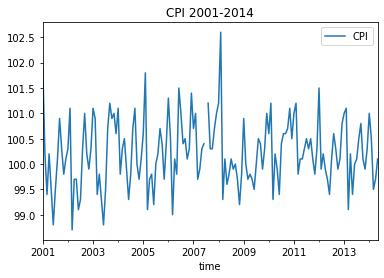

In [7]:
CPI.plot(title='CPI 2001-2014')

In [8]:
from arch.unitroot import ADF

CPItrain=CPItrain.dropna()
print(ADF(CPItrain,max_lags=10).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.947
P-value                         0.040
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
from statsmodels.tsa import stattools

LjungBox=stattools.q_stat(stattools.acf(CPItrain)[1:12],len(CPItrain))
LjungBox[1][-1] 

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


0.0005560128948515358

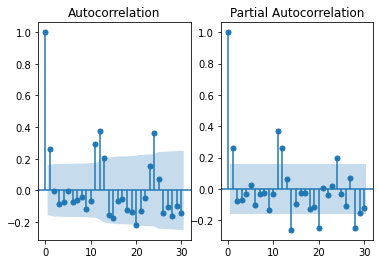

In [10]:
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
from statsmodels.tsa import arima_model

#將畫面一分為二
axe1=plt.subplot(121)
axe2=plt.subplot(122)

#在第一個畫面中畫出序列的自相關係數圖 
plot1=plot_acf(CPItrain,lags=30,ax=axe1)

#在第二個畫面中畫出序列的偏自相關係數圖
plot2=plot_pacf(CPItrain,lags=30,ax=axe2)

In [11]:
model1=arima_model.ARIMA(CPItrain,order=(1,0,1)).fit()
model1.summary()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date i

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    CPI   No. Observations:                  157
Model:                     ARMA(1, 1)   Log Likelihood                -150.339
Method:                       css-mle   S.D. of innovations              0.630
Date:                Mon, 17 May 2021   AIC                            308.678
Time:                        04:14:07   BIC                            320.903
Sample:                             0   HQIC                           313.643
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2373      0.066   1516.139      0.000     100.108     100.367
ar.L1.CPI      0.0934      0.248      0.377      0.706      -0.392       0.579
ma.L1.CPI      0.1932      0.240      0.805      0.421      -0.277       0.664
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.7069           +0.0000j           10.7069            0.0000
MA.1           -5.1771           +0.0000j            5.1771            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
#建立起其它階數的模型
model2=arima_model.ARIMA(CPItrain,order=(1,0,2)).fit()
model2.summary()
model3=arima_model.ARIMA(CPItrain,order=(2,0,1)).fit()
model4=arima_model.ARIMA(CPItrain,order=(2,0,2)).fit()
model5=arima_model.ARIMA(CPItrain,order=(3,0,2)).fit()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date i

In [13]:
model3.conf_int()

,0,1
const,100.216756,100.286655
ar.L1.CPI,1.101874,1.404685
ar.L2.CPI,-0.458491,-0.146583
ma.L1.CPI,-1.039059,-0.960941


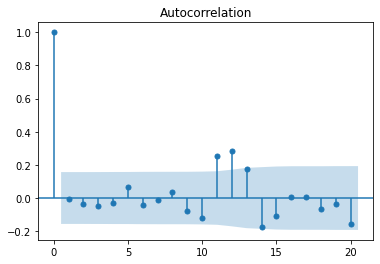

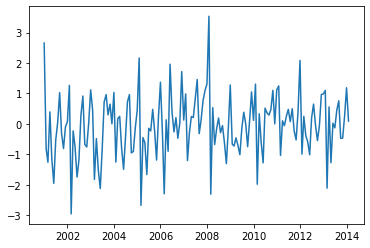

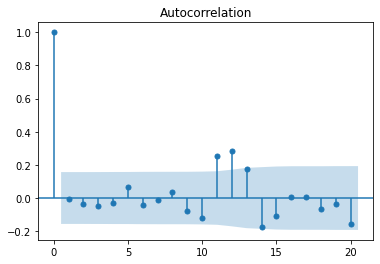

In [14]:
#繪製時間序列模擬的診斷圖
stdresid=model3.resid/math.sqrt(model3.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=20)

In [15]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1]

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


0.002646930742324348

In [16]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:20],len(stdresid))
LjungBox[1][-1]

0.0008835819334244017

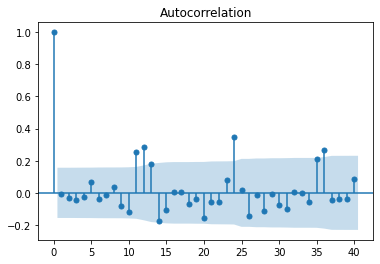

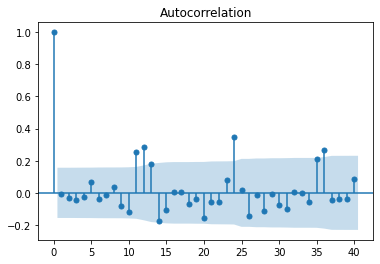

In [17]:
plot_acf(stdresid,lags=40)

In [18]:
model3.forecast(3)[0]
CPI.head(3)
CPItest

,CPI
time,
2014-03-01,99.5
2014-04-01,99.7
2014-05-01,100.1


In [19]:
# 匯入統一(1216) 2013年收盤價資料
taisun=pd.read_csv('1218.csv',sep='\t')
taisun.index=pd.to_datetime(taisun.Date)
taisun.head()
returns=taisun.ROI['2013-01-01':'2015-01-01']

In [20]:
returns

Date
2013-01-02    1.5674
2013-01-03   -0.6173
2013-01-04   -0.3106
2013-01-07    0.6231
2013-01-08   -1.2384
               ...  
2014-12-26    0.8264
2014-12-27   -0.8197
2014-12-29    0.0000
2014-12-30   -0.4132
2014-12-31   -0.4149
Name: ROI, Length: 494, dtype: float64

In [21]:
ADF(returns).summary()

Test Statistic,-15.535
P-value,0.000
Lags,2


In [22]:
stattools.q_stat(stattools.acf(returns)[1:10],len(returns))[1]

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([0.34563458, 0.27809919, 0.00662568, 0.01554591, 0.01479295,
       0.02546276, 0.0310641 , 0.01483178, 0.01835496])

In [23]:
model=arima_model.ARIMA(returns,order=(2,0,1)).fit()
model.summary()
model.conf_int()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date i

,0,1
const,-0.140687,0.044713
ar.L1.ROI,0.207816,0.926596
ar.L2.ROI,-0.168849,0.031424
ma.L1.ROI,-0.974822,-0.270368


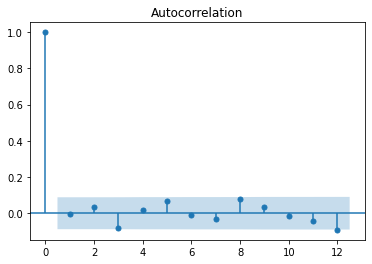

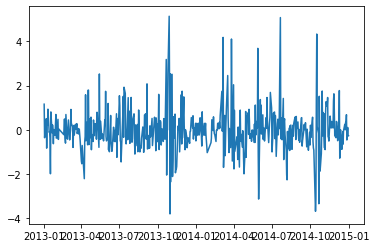

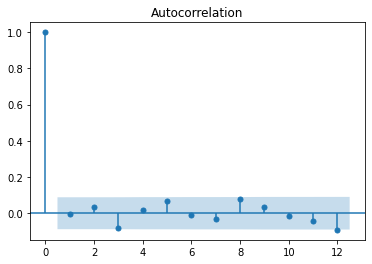

In [24]:
stdresid=model.resid/math.sqrt(model.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=12)

In [25]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:12],len(stdresid))
LjungBox[1]

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([0.92887675, 0.72609543, 0.26008115, 0.38626271, 0.27800643,
       0.38281918, 0.43225367, 0.24520119, 0.28449002, 0.36098705,
       0.37234774])